In [1]:
%matplotlib inline

In [22]:
from glob import glob
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
from IPython.core.display import display_html, display, HTML
from scipy.spatial.distance import *

In [4]:
images = {}
for image_path in glob('RTG/B/*'):
    name = image_path.split('/')[-1]
    images[name] = Image.open(image_path)

In [33]:
def generate_html_table(image_names, data, high_value, low_value):
    html_table = "<table><tr><td></td>{}</tr>".format("".join(["<td>{}</td>".format(name) for name in image_names]))
    for image1 in image_names:
        html_table += "<tr><td>{}</td>".format(image1)
        for image2 in image_names:
            value = data[image1][image2]
            if value > high_value or value < low_value:
                html_table += "<td style='font-weight:bold;'>{}</td>".format(value)
            else:
                html_table += "<td>{}</td>".format(value)
        html_table += "</tr>"
    html_table += "</table>"
    return html_table

In [40]:
histograms = {}
for name, image in images.items():
    histograms[name] = np.histogram(image.getdata(), bins=255, normed=True)[0][3:-1]

<Container object of 251 artists>

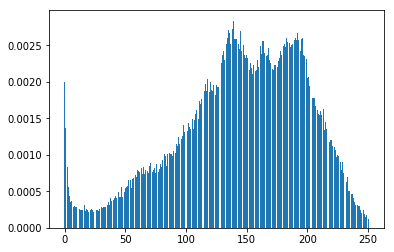

In [41]:
plt.bar(range(len(histograms['8_0_b.PNG'])), height=histograms['8_0_b.PNG'])

In [42]:
data = {}
for image1 in images:
    data[image1] = {}
    for image2 in images:
        hist_1 = histograms[image1]
        hist_2 = histograms[image2]
        data[image1][image2] = np.true_divide(np.sum(np.minimum(hist_1, hist_2)), np.sum(hist_2))

In [45]:
data = {}
for image1 in images:
    data[image1] = {}
    for image2 in images:
        hist_1 = histograms[image1]
        hist_2 = histograms[image2]
        data[image1][image2] = np.corrcoef(hist_1, hist_2)[0][1]

In [46]:
data['8_0_b.PNG']

{'0_10_b.PNG': 0.91328059227719793,
 '0_8_b.PNG': 0.92198875200979302,
 '10_0_b.PNG': 0.93656095324825783,
 '11_0_b.PNG': 0.96926121995367454,
 '12_0_b.PNG': 0.84687407651672431,
 '13_0_b.PNG': 0.90351560384881158,
 '14_0_b.PNG': 0.87602566688694661,
 '15_0_b.PNG': 0.84464868907013479,
 '16_0_b.PNG': 0.89027116757353453,
 '17_0_b.PNG': 0.88252028123813919,
 '18_0_b.PNG': 0.81865116182802544,
 '1_0_b.PNG': 0.88690284511753681,
 '1_2_b.PNG': 0.88994629926457425,
 '1_4_b.PNG': 0.92170686657878875,
 '1_6_b.PNG': 0.57629684051960439,
 '1_8_b.PNG': 0.84163778077042162,
 '2_0_b.PNG': 0.90703867417514306,
 '2_4_b.PNG': 0.77671808427521094,
 '2_6_b.PNG': 0.88955194860977038,
 '3_0_b.PNG': 0.94790911895437413,
 '3_6_b.PNG': 0.63644324295358057,
 '4_0_b.PNG': 0.95401417397795574,
 '4_6_b.PNG': 0.94008426280674284,
 '5_0_b.PNG': 0.70619422399004317,
 '5_6_b.PNG': 0.96796904328178146,
 '6_0_b.PNG': 0.84024145066510925,
 '7_0_b.PNG': 0.92993444596033348,
 '8_0_b.PNG': 1.0,
 '9_0_b.PNG': 0.7118077277

In [47]:
image_names = sorted(list(images.keys()), key=lambda x: [int(n) for n in x.split('_')[:2]])

In [48]:
display(HTML(generate_html_table(image_names, data, 0.83, 0)))

,0_8_b.PNG,0_10_b.PNG,1_0_b.PNG,1_2_b.PNG,1_4_b.PNG,1_6_b.PNG,1_8_b.PNG,2_0_b.PNG,2_4_b.PNG,2_6_b.PNG,3_0_b.PNG,3_6_b.PNG,4_0_b.PNG,4_6_b.PNG,5_0_b.PNG,5_6_b.PNG,6_0_b.PNG,7_0_b.PNG,8_0_b.PNG,9_0_b.PNG,10_0_b.PNG,11_0_b.PNG,12_0_b.PNG,13_0_b.PNG,14_0_b.PNG,15_0_b.PNG,16_0_b.PNG,17_0_b.PNG,18_0_b.PNG
0_8_b.PNG,1.0,0.9640355054431907,0.9091434033737331,0.9339656153644705,0.9498058632589099,0.5562061688725507,0.848643717717007,0.9262701875391709,0.7424738719454465,0.8545718826987193,0.8986499872855542,0.6002743151923333,0.9554278991197117,0.9401978587231083,0.6581545776823433,0.9081449572268985,0.879667763401395,0.8967903390089454,0.921988752009793,0.6758220475208091,0.8645353741356954,0.923173872905313,0.8236909859002969,0.8891719026833675,0.8302000553944037,0.8319418362097716,0.8584079099661255,0.8351297493099501,0.7597408923253682
0_10_b.PNG,0.9640355054431907,1.0,0.8893395761059343,0.9464071903968938,0.9369299022446332,0.482679246747137,0.8373008697752258,0.9263834292954117,0.6711541954811717,0.7881693250873438,0.8769106197917144,0.4898958435805797,0.96441638985233,0.9367930454753739,0.558344913937116,0.8935889593842226,0.913783906432087,0.9221319560319481,0.9132805922771979,0.7641210491741037,0.8924158609585622,0.925939838739844,0.8835036106432179,0.8966355083251124,0.8550406181876311,0.7928231768784291,0.8493017568693974,0.8202846242783259,0.7049930313773429
1_0_b.PNG,0.9091434033737332,0.8893395761059343,1.0,0.801591485912571,0.9614224191129639,0.7548611162390405,0.96799952459848,0.8554401759961755,0.88385318221011,0.9055289977681875,0.915329151130616,0.745251848928031,0.8734750879371411,0.907565401387454,0.7983832335941197,0.8269067797263847,0.7466196855352366,0.81762281744371,0.8869028451175368,0.4935015726635945,0.7764428707198274,0.8589698097743097,0.6823433801467012,0.8269955624121544,0.7029846328232704,0.8794093448306893,0.7681810046649604,0.763907165924448,0.7746274830615427
1_2_b.PNG,0.9339656153644705,0.9464071903968938,0.801591485912571,1.0,0.9040482352147251,0.40783884626726813,0.7030455648357108,0.971433536339603,0.5866840308456689,0.7141861926221813,0.80088577801583,0.43689430130170076,0.9708173332641044,0.9337495576787512,0.5113257053677333,0.9116931301956894,0.9161161935464144,0.9425083282720338,0.8899462992645742,0.8289025843361983,0.8903405676622225,0.9379361830192307,0.9195255392380672,0.929812959837074,0.8881665582000805,0.7502267603091466,0.9084526754498045,0.845436306080227,0.7456963371118549
1_4_b.PNG,0.94980586325891,0.9369299022446334,0.961422419112964,0.9040482352147251,0.9999999999999998,0.6529617807025702,0.8995174812187645,0.9363125195222939,0.7981055719034982,0.8590755007870519,0.8859930356642743,0.6561925907710671,0.9442641837350875,0.9671046368795964,0.7279110713655488,0.9078440615261752,0.8535230070662106,0.9055000491132218,0.9217068665787886,0.6666842010511842,0.8567226473372948,0.9345653305668589,0.8049187236507797,0.9214282912241465,0.8134680333132851,0.8350083565949675,0.8582221445033176,0.8342447412963923,0.827931066910551
1_6_b.PNG,0.5562061688725506,0.482679246747137,0.7548611162390405,0.4078388462672682,0.6529617807025702,1.0,0.8170477168473915,0.5319747367589223,0.9111076776108227,0.8103106207235999,0.6465427726635556,0.9588115063496022,0.48027941843386257,0.639424842047997,0.9407864866891482,0.48739335673280243,0.2678913797734338,0.5073166604537132,0.5762968405196044,-0.010831891121975154,0.45612276381239225,0.5491155651884427,0.25766551831711193,0.5267627111239217,0.3873357073049631,0.8174456740481061,0.5059997246067008,0.5859023478564621,0.712658112085731
1_8_b.PNG,0.848643717717007,0.8373008697752259,0.9679995245984802,0.7030455648357108,0.8995174812187645,0.8170477168473916,1.0,0.76116686238441,0.9020536739225223,0.9168924031418952,0.8940171023935004,0.7948536409281062,0.7958719447818251,0.8590564862976509,0.8244650231841818,0.752171301859934,0.6476296133509829,0.7471483608674844,0.8416377807704216,0.3799812410146518,0.7246488841582013,0.7963239018906205,0.6059594504128328,0.74